In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import Path
from tqdm.auto import tqdm
from types import SimpleNamespace
import os
from PIL import Image
import csv

In [ ]:
#!pip install kaggle


In [ ]:
#mkdir -p ~/.kaggle
#mv /google/mount/kaggle.json ~/.kaggle/
#chmod 600 ~/.kaggle/kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls -ltr /content/drive/MyDrive/Yolov8/

total 292
drwx------ 2 root root   4096 May 27 05:20  dataset
-rw------- 1 root root     69 May 27 07:10  kaggle.json
-rw------- 1 root root 234402 May 27 07:59  Yarra_Yolov8.ipynb
-rw------- 1 root root    121 May 27 11:35  classes_with_dont_care.json
drwx------ 2 root root   4096 May 28 05:09  weights
drwx------ 2 root root   4096 May 30 18:03  RoadLane
-rw------- 1 root root  33959 May 31 17:51  object-detection-via-yolov8.ipynb
drwx------ 2 root root   4096 May 31 17:53  output
drwx------ 2 root root   4096 May 31 18:21 'yarra (1)'
drwx------ 2 root root   4096 May 31 18:21  yarra
drwx------ 2 root root   4096 Jun  2 16:00  ObjectDetectionModleYOLOv8CityScapesData


In [ ]:
!mkdir -p /content/kitti_dataset
#!mkdir -p /content/kitti_dataset/kaggle
#!cp /content/drive/MyDrive/Yolov8//kaggle.json /content/kitti_dataset/kaggle
#!cp /content/drive/MyDrive/Yolov8//kaggle.json /root/.kaggle/
#!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
#ls -ltr /root/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [ ]:
#!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        kernels {list, files, init, push, pull, output, status}
                        models {instances, get, list, init, create, delete, update}
                        models instances {versions, get, files, init, create, delete, update}
                        models instances versions {init, create, download, delete, files}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d

In [ ]:
#!ls -ltr /root/.kaggle

total 0


In [ ]:
#!kaggle kernels pull srinivasyarra/object-detection-via-yolov8 -p /content/drive/MyDrive/Yolov8/


Source code downloaded to /content/drive/MyDrive/Yolov8/object-detection-via-yolov8.ipynb


In [ ]:
#!kaggle kernels output srinivasyarra/object-detection-via-yolov8 -p /content/drive/MyDrive/Yolov8/output/


In [ ]:
#!ls -ltr /content/drive/MyDrive/Yolov8/output/

total 0


In [ ]:
#!kaggle kernels output srinivasyarra/object-detection-via-yolov8/ -p /content/drive/MyDrive/Yolov8/yarra

Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/F1_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/PR_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/P_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/R_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/args.yaml
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/confusion_matrix.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/confusion_matrix_normalized.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/events.out.tfevents.1717149256.

In [ ]:
#!kaggle kernels list srinivasyarra/object-detection-via-yolov8/train -p /content/drive/MyDrive/Yolov8/yarra

usage: kaggle kernels [-h] {list,files,init,push,pull,output,status} ...
kaggle kernels: error: argument command: invalid choice: 'output/train' (choose from 'list', 'files', 'init', 'push', 'pull', 'output', 'status')


In [ ]:
#!kaggle kernels files srinivasyarra/object-detection-via-yolov8/train

Next Page Token = eyJHY3NQYWdlVG9rZW4iOiIxODAyNzcxNzkvb3V0cHV0L1lhcnJhLXlvbG92OG4ta2l0dGkvdHJhaW4vdmFsX2JhdGNoMl9sYWJlbHMuanBnIn0=
name                                              size  creationDate                      
------------------------------------------------  ----  --------------------------------  
F1_curve.png                                      941B  3:42 pm, Tuesday 28 May 2024 UTC  
PR_curve.png                                      941B  3:42 pm, Tuesday 28 May 2024 UTC  
P_curve.png                                       938B  3:42 pm, Tuesday 28 May 2024 UTC  
R_curve.png                                       938B  3:42 pm, Tuesday 28 May 2024 UTC  
args.yaml                                         932B  3:42 pm, Tuesday 28 May 2024 UTC  
confusion_matrix.png                              965B  3:42 pm, Tuesday 28 May 2024 UTC  
confusion_matrix_normalized.png                   998B  3:42 pm, Tuesday 28 May 2024 UTC  
events.out.tfevents.1716911259.548d817c3539.25.0  

In [ ]:
!ls -ltr "/content/drive/MyDrive/Yolov8/dataset/Road lane detection.v3i.yolov8.zip"

-rw------- 1 root root 7397862 May 30 05:15 '/content/drive/MyDrive/Yolov8/dataset/Road lane detection.v3i.yolov8.zip'


In [ ]:
def list_directory_structure(base_dir, depth=2):
    for root, dirs, files in os.walk(base_dir):
        level = root.replace(base_dir, '').count(os.sep)
        if level < depth:
            indent = ' ' * 4 * (level)
            print(f"{indent}{os.path.basename(root)}/")
            subindent = ' ' * 4 * (level + 1)
            for f in files:
                print(f"{subindent}{f}")

list_directory_structure('/content/drive/MyDrive/Yolov8/dataset/')

/
    Road lane detection.v3i.yolov8.zip
Kitti_road_dataset/
    dataset.yaml
    train/
        labels.cache
    test/
        labels.cache


In [ ]:
# Extract the downloaded dataset
!unzip -q "/content/drive/MyDrive/Yolov8/dataset/Road lane detection.v3i.yolov8.zip" -d /content/kitti_dataset

In [ ]:
!ls -ltr /content/kitti_dataset

total 20
drwxr-xr-x 4 root root 4096 Oct 15  2023 valid
drwxr-xr-x 4 root root 4096 Oct 15  2023 train
-rw-r--r-- 1 root root  973 Oct 15  2023 README.roboflow.txt
-rw-r--r-- 1 root root  155 Oct 15  2023 README.dataset.txt
-rw-r--r-- 1 root root  329 Oct 15  2023 data.yaml


In [ ]:
!ls -ltr /content/kitti_dataset/train/labels|wc -l

38


In [ ]:
!ls -ltr /content/kitti_dataset/train/images|wc -l

38


In [ ]:
!ls -ltr /content/kitti_dataset/train/labels|wc -l

38


In [ ]:
base_dir = Path('/content/kitti_dataset')
# Create a SimpleNamespace for the metadata
meta = SimpleNamespace(
    train_img_path = base_dir / 'train' / 'images',
    val_img_path = base_dir / 'valid' / 'images',
    test_img_path = base_dir / 'test' / 'images'
)

# List the images in each directory
meta.train_ims = sorted(list(meta.train_img_path.glob('*')))
meta.val_ims = sorted(list(meta.val_img_path.glob('*')))
meta.test_ims = sorted(list(meta.test_img_path.glob('*')))

# Assuming labels are stored in a similar structure as images
meta.label_path = base_dir / 'train' / 'labels'  # Update this if the label path is different

# List the labels in the directory
meta.train_labels = sorted(list(meta.label_path.glob('*')))

# Create DataFrames for each set
meta.train_df = pd.DataFrame({'image': meta.train_ims, 'label': meta.train_labels})
meta.val_df = pd.DataFrame({'image': meta.val_ims})
meta.test_df = pd.DataFrame({'image': meta.test_ims})

# Optional: Define the image dimensions (if known)
meta.im_width = 256
meta.im_height = 160

# Additional metadata from data.yaml
meta.nc = 4
meta.names = ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-']

meta.roboflow = SimpleNamespace(
    workspace = 'makariy-xodcv',
    project = 'road-lane-detection',
    version = 3,
    license = 'CC BY 4.0',
    url = 'https://universe.roboflow.com/makariy-xodcv/road-lane-detection/dataset/3'
)

# Define label columns (assuming the same as the older dataset)
meta.label_cols = [
    'label', 'truncated', 'occluded', 'alpha',
    'bbox_xmin', 'bbox_ymin', 'bbox_xmax',
    'bbox_ymax', 'dim_height', 'dim_width', 'dim_length',
    'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'
]

# Function to get labels
def get_label(label_path):
    data = pd.read_csv(
        label_path,
        sep=" ",
        names=meta.label_cols[:15],
        usecols=meta.label_cols[:15]
    )
    return data

# Example usage of get_label function with an index from meta.train_df
label_data = get_label(meta.train_df['label'][10])

# Print DataFrame summaries to verify
print(meta.train_df.head())
print(meta.val_df.head())
print(meta.test_df.head())

# Print additional metadata to verify
print(f"Number of classes (nc): {meta.nc}")
print(f"Class names: {meta.names}")
print(f"Roboflow project URL: {meta.roboflow.url}")

# Print example label data
print(label_data.head())

                                               image  \
0  /content/kitti_dataset/train/images/-_35_jpeg....   
1  /content/kitti_dataset/train/images/-_35_jpeg....   
2  /content/kitti_dataset/train/images/-_49_jpeg....   
3  /content/kitti_dataset/train/images/-_49_jpeg....   
4  /content/kitti_dataset/train/images/-_85_jpeg....   

                                               label  
0  /content/kitti_dataset/train/labels/-_35_jpeg....  
1  /content/kitti_dataset/train/labels/-_35_jpeg....  
2  /content/kitti_dataset/train/labels/-_49_jpeg....  
3  /content/kitti_dataset/train/labels/-_49_jpeg....  
4  /content/kitti_dataset/train/labels/-_85_jpeg....  
                                               image
0  /content/kitti_dataset/valid/images/-_38_jpeg....
1  /content/kitti_dataset/valid/images/-_45_jpeg....
2  /content/kitti_dataset/valid/images/-_4_jpeg.r...
3  /content/kitti_dataset/valid/images/-_54_jpeg....
4  /content/kitti_dataset/valid/images/-_78_jpeg....
Empty DataFrame

In [ ]:
#Define label columns (assuming the same as the older dataset)
meta.label_cols = [
    'label', 'truncated', 'occluded', 'alpha',
    'bbox_xmin', 'bbox_ymin', 'bbox_xmax',
    'bbox_ymax', 'dim_height', 'dim_width', 'dim_length',
    'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'
]

# Function to get labels
def get_label(label_path):
    data = pd.read_csv(
        label_path,
        sep=" ",
        names=meta.label_cols[:15],
        usecols=meta.label_cols[:15]
    )
    return data

In [ ]:
def open_image(p):
    im = cv.imread(str(p))
    im = cv.cvtColor(im,cv.COLOR_BGR2RGB)
    return im

def draw_box2d(idx, ax = None):
    sample = meta.df.iloc[idx,:]
    img = open_image(sample['image'])
    labels = get_label(sample['label'])
    for index, row in labels.iterrows():
        left_corner = (int(row.bbox_xmin), int(row.bbox_ymin))
        right_corner = (int(row.bbox_xmax), int(row.bbox_ymax))

        if row.label == 'DontCare':
            continue

        label_color = meta.label_colors.get(row.label,(0,255,0))
        img = cv.rectangle(img,left_corner, right_corner, label_color, 2)
        img = cv.putText(img, row.label,
                          (left_corner[0] + 10, left_corner[1] - 4) ,
                          cv.FONT_HERSHEY_SIMPLEX, 1,
                          label_color, 3)

    if ax == None:
        plt.imshow(img)
    else:
        ax.imshow(img)

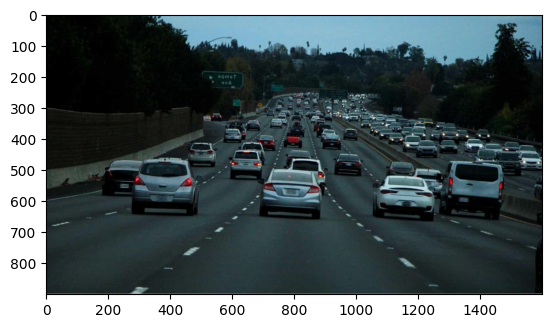

In [ ]:
from types import SimpleNamespace
from pathlib import Path
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

# Define the base directory for the new dataset
base_dir = Path('/content/kitti_dataset')  # Change this to your dataset's actual base directory

# Create a SimpleNamespace for the metadata
meta = SimpleNamespace(
    train_img_path = base_dir / 'train' / 'images',
    val_img_path = base_dir / 'valid' / 'images',
    test_img_path = base_dir / 'test' / 'images',
    label_path = base_dir / 'train' / 'labels'  # Update this if the label path is different
)

# List the images and labels in each directory
meta.train_ims = sorted(list(meta.train_img_path.glob('*')))
meta.val_ims = sorted(list(meta.val_img_path.glob('*')))
meta.test_ims = sorted(list(meta.test_img_path.glob('*')))
meta.train_labels = sorted(list(meta.label_path.glob('*')))

# Create DataFrames for each set
meta.train_df = pd.DataFrame({'image': meta.train_ims, 'label': meta.train_labels})
meta.val_df = pd.DataFrame({'image': meta.val_ims})
meta.test_df = pd.DataFrame({'image': meta.test_ims})

# Additional metadata from data.yaml
meta.nc = 4
meta.names = ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-']
meta.label_colors = {
    'lane1-white-': (255, 255, 255),
    'lane1-yellow-': (255, 255, 0),
    'lane2-white-': (200, 200, 200),
    'lane2-yellow-': (200, 200, 0)
}

meta.label_cols = [
    'label', 'truncated', 'occluded', 'alpha',
    'bbox_xmin', 'bbox_ymin', 'bbox_xmax',
    'bbox_ymax', 'dim_height', 'dim_width', 'dim_length',
    'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'
]

# Function to get labels
def get_label(label_path):
    data = pd.read_csv(
        label_path,
        sep=" ",
        names=meta.label_cols[:15],
        usecols=meta.label_cols[:15]
    )
    return data

# Function to open an image
def open_image(p):
    im = cv.imread(str(p))
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    return im

# Function to draw 2D bounding boxes
def draw_box2d(idx, ax=None):
    if idx >= len(meta.train_df):
        print(f"Index {idx} is out of bounds for the dataset of size {len(meta.train_df)}.")
        return

    sample = meta.train_df.iloc[idx, :]
    img = open_image(sample['image'])
    labels = get_label(sample['label'])
    for index, row in labels.iterrows():
        left_corner = (int(row.bbox_xmin), int(row.bbox_ymin))
        right_corner = (int(row.bbox_xmax), int(row.bbox_ymax))

        if row.label == 'DontCare':
            continue

        label_color = meta.label_colors.get(row.label, (0, 255, 0))
        img = cv.rectangle(img, left_corner, right_corner, label_color, 2)
        img = cv.putText(img, str(row.label),  # Ensure label is string
                          (left_corner[0] + 10, left_corner[1] - 4),
                          cv.FONT_HERSHEY_SIMPLEX, 1,
                          label_color, 3)

    if ax is None:
        plt.imshow(img)
        plt.show()
    else:
        ax.imshow(img)

# Example usage
draw_box2d(25)  # This will display the image with bounding boxes for the 11th image in the training set


In [ ]:
# Print example label data
print(label_data.head())

   label  truncated  occluded     alpha  bbox_xmin  bbox_ymin  bbox_xmax  \
0      3   0.629386  1.000000  0.541187   0.446363   0.531164   0.395308   
1      3   0.564297  1.000000  0.528326   0.458577   0.522016   0.390890   
2      2   1.000000  0.549845  0.919591   0.511087   0.766482   0.432429   
3      2   0.429910  0.358530  0.425199   0.357616   0.391876   0.374977   

   bbox_ymax  dim_height  dim_width  dim_length     loc_x     loc_y     loc_z  \
0   0.526025    0.372807   0.522855    0.355674  0.519737  0.355629  0.522844   
1   0.517929    0.355943   0.515043    0.356007  0.515380  0.377103  0.517755   
2   0.660687    0.374520   0.621111    0.356474  0.616828  0.358187  0.636445   
3   0.000000    0.602548   0.000039    0.619779  0.393246  0.379774  0.429910   

   rotation_y  
0    0.377680  
1    0.394456  
2    0.367896  
3    0.358530  


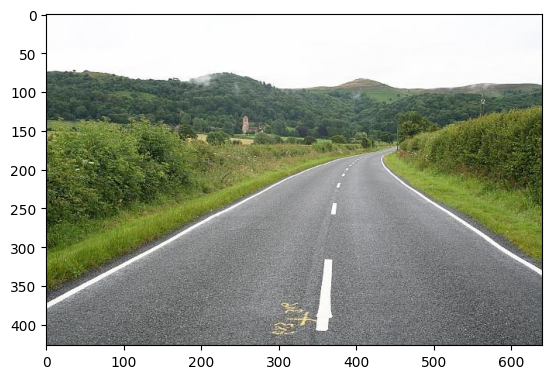

In [ ]:
draw_box2d(16)

In [ ]:
class_names = [
    'lane1-white-',  # 0
    'lane1-yellow-', # 1
    'lane2-white-',  # 2
    'lane2-yellow-'  # 3
]

CLAZZ_NUMBERS = {
    name: idx for idx, name in enumerate(class_names)
}


In [ ]:
import os
from PIL import Image
import csv
from tqdm import tqdm
from types import SimpleNamespace
import logging
import argparse
import sys

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Constants and variables
all_classes = []
OUT_LABELS_DIR = "labels_with_dont_care"
KEY_DONT_CARE = "DontCare"
class_names = ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-', 'DontCare']

CLAZZ_NUMBERS = {
    name: idx for idx, name in enumerate(class_names)
}

def getSampleId(path):
    basename = os.path.basename(path)
    return os.path.splitext(basename)[0]

def resolveClazzNumberOrNone(clazz, use_dont_care):
    if use_dont_care and clazz == KEY_DONT_CARE:
        return CLAZZ_NUMBERS[clazz]
    elif clazz in CLAZZ_NUMBERS:
        return CLAZZ_NUMBERS[clazz]
    else:
        logging.warning(f"Unknown class type '{clazz}' encountered and will be ignored.")
        return None

def convertToYoloBBox(bbox, size):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (bbox[0] + bbox[1]) / 2.0
    y = (bbox[2] + bbox[3]) / 2.0
    w = bbox[1] - bbox[0]
    h = bbox[3] - bbox[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def readRealImageSize(img_path):
    try:
        return Image.open(img_path).size
    except Exception as e:
        logging.error(f"Error reading image size for {img_path}: {e}")
        return (1, 1)  # Fallback to avoid division by zero

def parseSample(lbl_path, img_path, use_dont_care):
    yolo_labels = []
    try:
        with open(lbl_path) as csv_file:
            reader = csv.DictReader(csv_file, fieldnames=[
                "type", "truncated", "occluded", "alpha", "bbox2_left", "bbox2_top",
                "bbox2_right", "bbox2_bottom", "bbox3_height", "bbox3_width",
                "bbox3_length", "bbox3_x", "bbox3_y", "bbox3_z", "bbox3_yaw", "score"
            ], delimiter=" ")
            for row in reader:
                all_classes.append(row['type'])
                clazz_number = resolveClazzNumberOrNone(row["type"], use_dont_care)
                if clazz_number is not None:
                    size = readRealImageSize(img_path)
                    bbox = (
                        float(row["bbox2_left"]),
                        float(row["bbox2_right"]),
                        float(row["bbox2_top"]),
                        float(row["bbox2_bottom"])
                    )
                    yolo_bbox = convertToYoloBBox(bbox, size)
                    yolo_label = (clazz_number,) + yolo_bbox
                    yolo_labels.append(yolo_label)
    except Exception as e:
        logging.error(f"Error parsing sample {lbl_path}: {e}")
    return yolo_labels

def main(label_dir, image_2_dir, training_samples, use_dont_care):
    # Create output directory if it doesn't exist
    if not os.path.exists(OUT_LABELS_DIR):
        os.makedirs(OUT_LABELS_DIR)

    logging.info("Generating darknet labels...")
    sample_img_paths = []
    for dir_path, sub_dirs, files in os.walk(label_dir):
        for file_name in tqdm(files):
            if file_name.endswith(".txt"):
                lbl_path = os.path.join(dir_path, file_name)
                sample_id = getSampleId(lbl_path)
                img_path = os.path.join(image_2_dir, "{}.png".format(sample_id))
                sample_img_paths.append(img_path)
                yolo_labels = parseSample(lbl_path, img_path, use_dont_care)
                with open(os.path.join(OUT_LABELS_DIR, "{}.txt".format(sample_id)), "w") as yolo_label_file:
                    for lbl in yolo_labels:
                        yolo_label_file.write("{} {} {} {} {}\n".format(*lbl))

    logging.info("Label generation complete.")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Convert dataset labels to YOLO format.")
    parser.add_argument('--label_dir', type=str, required=True, help='Directory containing label files')
    parser.add_argument('--image_2_dir', type=str, required=True, help='Directory containing training images')
    parser.add_argument('--training_samples', type=int, default=1, help='Number of training samples to process')
    parser.add_argument('--use_dont_care', type=bool, default=False, help='Whether to include "DontCare" class')

    try:
        args = parser.parse_args()
        main(args.label_dir, args.image_2_dir, args.training_samples, args.use_dont_care)
    except SystemExit as e:
        if e.code == 2:  # Argument parsing error
            # Setting default arguments for notebook/colab usage
            logging.warning("Argument parsing error. Using default values for notebook usage.")
            args = SimpleNamespace(
                label_dir='/content/kitti_dataset/train/labels',  # Adjust these paths as necessary
                image_2_dir='/content/kitti_dataset/train/images',
                training_samples=1,
                use_dont_care=True
            )
            main(args.label_dir, args.image_2_dir, args.training_samples, args.use_dont_care)
        else:
            raise


usage: colab_kernel_launcher.py [-h] --label_dir LABEL_DIR --image_2_dir IMAGE_2_DIR
                                [--training_samples TRAINING_SAMPLES]
                                [--use_dont_care USE_DONT_CARE]
colab_kernel_launcher.py: error: the following arguments are required: --label_dir, --image_2_dir
100%|██████████| 37/37 [00:00<00:00, 216.04it/s]


In [ ]:
import os
from PIL import Image
import csv
from tqdm import tqdm
from types import SimpleNamespace
import logging
import argparse
import sys

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Constants and variables
all_classes = []
OUT_LABELS_DIR = "labels"
class_names = [
    'lane1-white-',  # 0
    'lane1-yellow-', # 1
    'lane2-white-',  # 2
    'lane2-yellow-'  # 3
]

CLAZZ_NUMBERS = {
    name: idx for idx, name in enumerate(class_names)
}

def getSampleId(path):
    basename = os.path.basename(path)
    return os.path.splitext(basename)[0]

def resolveClazzNumberOrNone(clazz):
    if clazz in CLAZZ_NUMBERS:
        return CLAZZ_NUMBERS[clazz]
    else:
        logging.warning(f"Unknown class type '{clazz}' encountered and will be ignored.")
        return None

def convertToYoloBBox(bbox, size):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (bbox[0] + bbox[1]) / 2.0
    y = (bbox[2] + bbox[3]) / 2.0
    w = bbox[1] - bbox[0]
    h = bbox[3] - bbox[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def readRealImageSize(img_path):
    try:
        return Image.open(img_path).size
    except Exception as e:
        logging.error(f"Error reading image size for {img_path}: {e}")
        return (1, 1)  # Fallback to avoid division by zero

def parseSample(lbl_path, img_path):
    yolo_labels = []
    try:
        with open(lbl_path) as csv_file:
            reader = csv.DictReader(csv_file, fieldnames=[
                "type", "truncated", "occluded", "alpha", "bbox2_left", "bbox2_top",
                "bbox2_right", "bbox2_bottom", "bbox3_height", "bbox3_width",
                "bbox3_length", "bbox3_x", "bbox3_y", "bbox3_z", "bbox3_yaw", "score"
            ], delimiter=" ")
            for row in reader:
                all_classes.append(row['type'])
                clazz_number = resolveClazzNumberOrNone(row["type"])
                if clazz_number is not None:
                    size = readRealImageSize(img_path)
                    bbox = (
                        float(row["bbox2_left"]),
                        float(row["bbox2_right"]),
                        float(row["bbox2_top"]),
                        float(row["bbox2_bottom"])
                    )
                    yolo_bbox = convertToYoloBBox(bbox, size)
                    yolo_label = (clazz_number,) + yolo_bbox
                    yolo_labels.append(yolo_label)
    except Exception as e:
        logging.error(f"Error parsing sample {lbl_path}: {e}")
    return yolo_labels

def main(label_dir, image_2_dir, training_samples):
    # Create output directory if it doesn't exist
    if not os.path.exists(OUT_LABELS_DIR):
        os.makedirs(OUT_LABELS_DIR)

    logging.info("Generating darknet labels...")
    sample_img_paths = []
    for dir_path, sub_dirs, files in os.walk(label_dir):
        for file_name in tqdm(files):
            if file_name.endswith(".txt"):
                lbl_path = os.path.join(dir_path, file_name)
                sample_id = getSampleId(lbl_path)
                img_path = os.path.join(image_2_dir, "{}.png".format(sample_id))
                sample_img_paths.append(img_path)
                yolo_labels = parseSample(lbl_path, img_path)
                with open(os.path.join(OUT_LABELS_DIR, "{}.txt".format(sample_id)), "w") as yolo_label_file:
                    for lbl in yolo_labels:
                        yolo_label_file.write("{} {} {} {} {}\n".format(*lbl))

    logging.info("Label generation complete.")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Convert dataset labels to YOLO format.")
    parser.add_argument('--label_dir', type=str, required=True, help='Directory containing label files')
    parser.add_argument('--image_2_dir', type=str, required=True, help='Directory containing training images')
    parser.add_argument('--training_samples', type=int, default=1, help='Number of training samples to process')

    try:
        args = parser.parse_args()
        main(args.label_dir, args.image_2_dir, args.training_samples)
    except SystemExit as e:
        if e.code == 2:  # Argument parsing error
            # Setting default arguments for notebook/colab usage
            logging.warning("Argument parsing error. Using default values for notebook usage.")
            args = SimpleNamespace(
                label_dir='/content/kitti_dataset/train/labels',  # Adjust these paths as necessary
                image_2_dir='/content/kitti_dataset/train/images',
                training_samples=1
            )
            main(args.label_dir, args.image_2_dir, args.training_samples)
        else:
            raise


usage: colab_kernel_launcher.py [-h] --label_dir LABEL_DIR --image_2_dir IMAGE_2_DIR
                                [--training_samples TRAINING_SAMPLES]
colab_kernel_launcher.py: error: the following arguments are required: --label_dir, --image_2_dir
100%|██████████| 37/37 [00:00<00:00, 221.26it/s]


In [ ]:
import json
with open('classes_with_dont_care.json','w') as f:
    json.dump(CLAZZ_NUMBERS,f)

In [ ]:
CLAZZ_NUMBERS

{'lane1-white-': 0, 'lane1-yellow-': 1, 'lane2-white-': 2, 'lane2-yellow-': 3}

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.6 MB/s eta 0:00:00


In [ ]:
%env WANDB_DISABLED=True

env: WANDB_DISABLED=True


In [ ]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import shutil
from PIL import Image

In [ ]:
base_dir = Path('/content/kitti_dataset')
img_path = base_dir / 'train'/'images'
label_path = Path('./')
with open('classes_with_dont_care.json','r') as f:
    classes = json.load(f)

classes

{'lane1-white-': 0, 'lane1-yellow-': 1, 'lane2-white-': 2, 'lane2-yellow-': 3}

In [ ]:
ims = sorted(list(img_path.glob('*')))
labels = sorted(list(label_path.glob('*')))
pairs = list(zip(ims,labels))
pairs[:2]

[(PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.3d4897fbad4d325fe12f540639d4fd19.jpg'),
  PosixPath('.config')),
 (PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.4eea536ecdb0ff1d9a3b0e3b629105a8.jpg'),
  PosixPath('classes_with_dont_care.json'))]

In [ ]:
ims = sorted(list(img_path.glob('*')))
labels = sorted(list(label_path.glob('*')))
pairs = list(zip(ims,labels))
pairs[:2]

[(PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.3d4897fbad4d325fe12f540639d4fd19.jpg'),
  PosixPath('.config')),
 (PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.4eea536ecdb0ff1d9a3b0e3b629105a8.jpg'),
  PosixPath('classes_with_dont_care.json'))]

In [ ]:
train, test = train_test_split(pairs,test_size=0.1,shuffle=True)
len(train), len(test)

(6, 1)

In [ ]:
train_path = Path('train').resolve()
train_path.mkdir(exist_ok=True)
valid_path = Path('valid').resolve()
valid_path.mkdir(exist_ok=True)

In [ ]:
import shutil
from tqdm import tqdm
from pathlib import Path
import json
from sklearn.model_selection import train_test_split

# Base directory and paths
base_dir = Path('/content/kitti_dataset')
img_path = base_dir / 'train' / 'images'
label_path = base_dir / 'train' / 'labels'

# Load classes
with open('classes_with_dont_care.json', 'r') as f:
    classes = json.load(f)

# List images and labels, filtering out directories
ims = sorted([p for p in img_path.glob('*') if p.is_file()])
labels = sorted([p for p in label_path.glob('*') if p.is_file()])

# Pair images and labels
pairs = list(zip(ims, labels))

# Split into training and testing sets
train, test = train_test_split(pairs, test_size=0.1, shuffle=True)
print(len(train), len(test))

# Create target directories
train_path = Path('train').resolve()
train_path.mkdir(exist_ok=True)
valid_path = Path('valid').resolve()
valid_path.mkdir(exist_ok=True)

# Copy files
for t_img, t_lb in tqdm(train):
    im_path = train_path / t_img.name
    lb_path = train_path / t_lb.name
    shutil.copy(t_img, im_path)
    shutil.copy(t_lb, lb_path)

print("File copy complete.")


33 4


100%|██████████| 33/33 [00:00<00:00, 387.37it/s]

File copy complete.


In [ ]:
for t_img, t_lb in tqdm(test):
    im_path = valid_path / t_img.name
    lb_path = valid_path / t_lb.name
    shutil.copy(t_img,im_path)
    shutil.copy(t_lb,lb_path)

100%|██████████| 4/4 [00:00<00:00, 694.62it/s]


## YAML file for the data

In [ ]:
yaml_file = 'names:\n'
yaml_file += '\n'.join(f'- {c}' for c in classes)
yaml_file += f'\nnc: {len(classes)}'
yaml_file += f'\ntrain: {str(train_path)}\nval: {str(valid_path)}'
with open('data.yaml','w') as f:
    f.write(yaml_file)

In [ ]:
!cat data.yaml

names:
- lane1-white-
- lane1-yellow-
- lane2-white-
- lane2-yellow-
nc: 4
train: /content/train
val: /content/valid

In [ ]:
!ls -ltr /content/kitti_dataset/train/labels/|wc -l

38


In [ ]:
!ls -ltr /content/drive/MyDrive/Yolov8/ObjectDetectionModleYOLOv8CityScapesData/best.pt

-rw------- 1 root root 12917283 Jun  2 15:27 /content/drive/MyDrive/Yolov8/ObjectDetectionModleYOLOv8CityScapesData/best.pt


In [ ]:
!pip install dill

from ultralytics import YOLO
#model = YOLO('yolov8n.yaml')
model = YOLO('/content/drive/MyDrive/Yolov8/ObjectDetectionModleYOLOv8CityScapesData/best.pt')

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!cat /content/kitti_dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-']

roboflow:
  workspace: makariy-xodcv
  project: road-lane-detection
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/makariy-xodcv/road-lane-detection/dataset/3

In [ ]:
!cat /content/data.yaml

names:
- lane1-white-
- lane1-yellow-
- lane2-white-
- lane2-yellow-
nc: 4
train: /content/train
val: /content/valid

In [ ]:
!ls -ltr /content/train|wc -l

67


In [ ]:
'''train_results = model.train(
    data='data.yaml',
    epochs=300, # Increased epochs
    patience=0, # Early stopping after 5 epochs of no improvement
    batch_size=16,  # Batch size
    img_size=640,  # Image size
    mixup=0.1,# Mixup augmentation factor
    project='Yarra-yolov8n-roadlane',
    name='improved_training',  # Naming the experiment
    device=0 ) # Use GPU if available)
'''


# Train the model with the specified parameters
train_results =model.train(
    data='data.yaml',  # Path to the dataset configuration file
    epochs=300,  # Increased epochs
    patience=0,  # No early stopping
    batch=32,  # Batch size
    imgsz=640,  # Image size
    mixup=0.1,  # Mixup augmentation factor
    project='Yarra-transfer-learning-cityscapes2roadlane',  # Project name
    name='cityscapes2roadlane',  # Naming the experiment
    device='0'  # Use GPU if available, specified as a string
)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Yolov8/ObjectDetectionModleYOLOv8CityScapesData/best.pt, data=data.yaml, epochs=300, time=None, patience=0, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=Yarra-transfer-learning-cityscapes2roadlane, name=cityscapes2roadlane, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 26.2MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 108MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/train... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 1588.66it/s]

train: New cache created: /content/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1213.81it/s]

val: New cache created: /content/valid.cache


Plotting labels to Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300       4.5G      2.113      4.289      1.764          2        640: 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4         16     0.0101      0.556     0.0798     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.47G      1.941      3.829      1.862          6        640: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all          4         16     0.0102      0.556     0.0676     0.0189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300       4.5G      2.005      3.891      1.949         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all          4         16     0.0106      0.556      0.151     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.51G      1.536      3.829      1.589          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all          4         16     0.0104      0.556      0.153     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.45G      1.698      3.968      1.761          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all          4         16     0.0137      0.667      0.223     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.41G      1.357      3.677      1.458          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all          4         16     0.0127      0.611       0.27     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.42G      1.524      3.731      1.642          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          4         16      0.014      0.667      0.345      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.43G      1.267      3.231      1.298         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all          4         16     0.0173      0.778      0.404      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      4.41G      1.001      4.032      1.427          1        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          4         16     0.0182      0.778      0.424      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.47G      1.344      3.234      1.444          4        640: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          4         16     0.0176      0.722      0.413      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.45G      1.468      2.964      1.446         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all          4         16     0.0175      0.778      0.333      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      4.45G      1.066      2.384      1.136         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          4         16      0.932      0.218      0.304      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300       4.5G     0.9902      2.058      1.087          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          4         16      0.514      0.222      0.361      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      4.51G      1.078      2.133      1.059          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          4         16      0.694      0.245      0.412      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300       4.4G      1.063      2.133      1.122         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all          4         16     0.0195      0.833      0.413      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.42G      1.791      2.484      1.887          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          4         16       0.42      0.329      0.428      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.42G      1.008      1.709      1.059          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all          4         16     0.0254      0.833      0.421      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      4.45G       1.13      2.014      1.215          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          4         16      0.975      0.167      0.341      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      4.41G     0.9129      1.531      1.069          3        640: 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          4         16      0.884      0.167      0.373      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.45G     0.9317      1.536      1.091          5        640: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          4         16      0.837      0.167        0.4       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      4.51G       1.42      2.291      1.404          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          4         16      0.767      0.167      0.294      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.41G      1.074      3.344      1.108          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          4         16      0.818      0.167      0.303      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.42G     0.9423      1.496      1.039          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          4         16      0.667      0.166       0.29      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      4.48G      1.208      1.657      1.169          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all          4         16      0.581      0.273      0.316      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      4.44G     0.9823      3.731      1.267          1        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all          4         16          1        0.2      0.304      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      4.46G     0.8983      1.424      1.051          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          4         16          1      0.209      0.275      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      4.42G      0.953      2.086      1.047          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]

                   all          4         16      0.897      0.222      0.296       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      4.46G      1.061      1.554      1.073         12        640: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all          4         16      0.614      0.222      0.311        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      4.46G      1.103      1.381      1.155          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all          4         16      0.567      0.226      0.313      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      4.41G      1.082      1.539       1.15         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all          4         16      0.583       0.25      0.321      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      4.51G     0.9191      1.527      1.068          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all          4         16      0.566       0.25      0.293      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      4.51G     0.8986      1.302      1.093          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]


                   all          4         16      0.981      0.167      0.296      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      4.42G     0.9492      1.336      1.078          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          4         16      0.989      0.167      0.314      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      4.42G     0.8574      1.176      1.083          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all          4         16      0.995      0.167      0.302      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      4.41G     0.7882      1.233      1.059          6        640: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all          4         16      0.661      0.167       0.26      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      4.51G       1.14       1.64      1.204         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all          4         16      0.994      0.167      0.241      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      4.42G      0.773      1.215      1.058          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          4         16      0.642      0.302      0.301      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      4.42G       1.17      1.359      1.173         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all          4         16        0.6       0.25      0.352      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      4.46G     0.7396      1.419      1.045          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all          4         16      0.738      0.302      0.364       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.51G     0.9322      1.081       0.97          5        640: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


                   all          4         16      0.753      0.368      0.378      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      4.51G     0.8846      1.075      1.036         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          4         16      0.706      0.389      0.405      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      4.52G     0.7776      1.078       1.01         15        640: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all          4         16       0.49      0.444      0.372      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      4.46G     0.6702      1.019     0.9871          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all          4         16      0.541      0.506      0.419      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      4.46G     0.8064       1.02     0.9446         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all          4         16      0.496      0.408      0.356      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      4.46G     0.7825      1.085     0.9877         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all          4         16      0.314      0.393      0.283      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      4.51G      1.187      1.461      1.268         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          4         16      0.446      0.404      0.365      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      4.42G     0.8727      1.251      1.047          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all          4         16      0.418      0.427      0.325      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300       4.5G      1.082      1.656      1.596          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          4         16      0.611      0.333      0.312      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      4.51G     0.9681      1.022     0.9974         17        640: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


                   all          4         16       0.39       0.25      0.307      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      4.47G     0.8317      1.616     0.9737          5        640: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]


                   all          4         16       0.29      0.306      0.262      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      4.44G      1.066      1.188      1.305          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all          4         16      0.417      0.444       0.38      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      4.41G     0.9625      1.015      1.099          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all          4         16      0.601      0.268      0.385       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      4.44G     0.9315      1.062      1.046         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.31it/s]

                   all          4         16       0.67       0.23      0.374      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      4.41G      1.034      1.492      1.207          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all          4         16      0.428      0.361      0.345      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      4.41G     0.9889      1.265      1.025         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          4         16      0.497       0.25      0.312      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      4.49G      1.082      1.511      1.216         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          4         16       0.89      0.194        0.3      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      4.51G     0.7964      1.145      1.044          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all          4         16      0.451       0.25      0.279      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      4.44G     0.7793      1.474     0.9403          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          4         16      0.395      0.333      0.334      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      4.52G     0.8464      1.094     0.9975         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all          4         16      0.349      0.453      0.304      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      4.41G      1.155      1.472      1.218         12        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all          4         16      0.678      0.389      0.284      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      4.51G     0.7941      1.013      1.019         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all          4         16      0.781      0.333      0.332      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      4.43G     0.8738      1.148     0.9857          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          4         16      0.352      0.322      0.319      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      4.52G     0.8042      2.521      1.411          1        640: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]

                   all          4         16      0.425      0.278      0.269      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      4.52G      1.196      1.134      1.234          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all          4         16      0.278      0.222      0.228       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      4.41G     0.6888     0.9394      1.015         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          4         16      0.379      0.222       0.24      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      4.22G     0.7965      1.104      1.046          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all          4         16      0.604      0.222      0.277      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      4.46G      1.127       1.26      1.145          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


                   all          4         16      0.394       0.26      0.255      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      4.43G     0.6797     0.9776     0.9507          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all          4         16      0.289      0.278      0.244      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      4.41G     0.6782     0.8403     0.9592          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          4         16      0.289      0.278       0.25       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      4.51G     0.6352     0.9803     0.9252          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


                   all          4         16      0.438      0.412       0.35      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      4.47G     0.7311     0.8602     0.9558          7        640: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all          4         16      0.498      0.417      0.369       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      4.45G     0.6589     0.8408     0.9477          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all          4         16       0.51      0.398      0.369      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      4.48G     0.8405     0.9042     0.9698          4        640: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all          4         16       0.53      0.491      0.418      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.44G     0.9051       1.03      1.013          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all          4         16      0.584      0.472      0.441      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.46G     0.6125      1.428     0.8891          2        640: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all          4         16      0.724      0.361      0.377      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      4.46G     0.6122     0.7668     0.9067          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]

                   all          4         16      0.819      0.361        0.4      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      4.42G     0.7453     0.9039     0.9982          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          4         16      0.823      0.414      0.455      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      4.44G     0.8087       1.28     0.9659          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          4         16      0.647      0.456      0.543      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      4.46G     0.8634      1.749      1.018          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all          4         16      0.621      0.472      0.574      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      4.42G     0.7083     0.9508     0.9322         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all          4         16      0.624      0.417      0.537      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      4.41G     0.6224        1.1     0.9393          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          4         16      0.644      0.378      0.585      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      4.41G     0.5993      1.077     0.9414          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          4         16      0.747      0.633      0.719      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      4.46G     0.5568     0.7259     0.9316          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all          4         16      0.692      0.611      0.627      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      4.44G     0.7744     0.9039     0.9766         12        640: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all          4         16      0.785      0.595      0.653      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      4.41G     0.7856      1.016     0.9919         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all          4         16       0.79      0.583      0.675      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      4.51G     0.7017     0.8489     0.9436          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


                   all          4         16      0.746      0.528      0.674      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      4.44G     0.9998      1.229      1.099         18        640: 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.81it/s]

                   all          4         16      0.652      0.528      0.635      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      4.44G     0.7656     0.8297     0.9544         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all          4         16       0.56      0.528      0.556      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      4.51G     0.6608     0.8552     0.9299         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all          4         16      0.604      0.471      0.513      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      4.46G      1.211      2.447      1.376          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all          4         16      0.563      0.528      0.581      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      4.51G     0.7571      1.059      1.013          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          4         16      0.528      0.472      0.542      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      4.52G     0.7722     0.8879       1.01          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.91it/s]

                   all          4         16      0.645      0.528      0.557      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      4.46G     0.7228      1.129     0.9439          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


                   all          4         16      0.877      0.583      0.634      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      4.46G     0.5604     0.7248      0.937         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          4         16      0.708      0.583      0.621      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      4.44G     0.8963     0.8165        1.2          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all          4         16      0.796      0.444      0.514      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      4.42G     0.6963     0.8406     0.9874          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          4         16        0.7      0.389      0.407      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      4.44G     0.8008     0.9058      1.022          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all          4         16      0.383      0.333      0.382      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      4.46G     0.7186     0.7599     0.9795         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all          4         16      0.282      0.595      0.358      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      4.43G     0.6032      0.704     0.9252          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.95it/s]

                   all          4         16      0.289        0.5      0.348      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      4.51G      1.223      2.756      1.271          1        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          4         16      0.363      0.361      0.307      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      4.46G     0.6672     0.8621     0.9614          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all          4         16      0.376      0.361      0.349      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      4.44G     0.6062     0.7385     0.8961          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all          4         16      0.522      0.417      0.469       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      4.51G     0.7513     0.8795     0.9561          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all          4         16      0.776      0.612      0.604      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      4.41G     0.8372      1.095      1.065          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          4         16      0.807      0.483      0.584      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      4.44G     0.6596     0.6858      0.936          8        640: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all          4         16      0.667      0.583      0.558      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      4.47G      0.971     0.8839      1.202          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all          4         16      0.721      0.578      0.537      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      4.41G     0.6852     0.8046     0.8981         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          4         16      0.829      0.444      0.502      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      4.44G     0.6807     0.8275     0.9637          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]


                   all          4         16      0.655      0.578      0.533      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      4.46G     0.4941      1.029     0.9679          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          4         16      0.603      0.655      0.568      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      4.52G     0.5489     0.6918     0.9172          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          4         16      0.619      0.516      0.525      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      4.51G     0.5893      1.057      0.867          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all          4         16      0.661       0.55      0.597      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      4.52G      0.642     0.7513     0.8876         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all          4         16      0.545      0.545      0.521      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      4.51G     0.4686     0.9087     0.9464          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


                   all          4         16      0.517      0.652      0.539      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      4.45G     0.5659     0.6676     0.9506          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all          4         16      0.571      0.631      0.518      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      4.46G     0.6655     0.9635      1.007          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


                   all          4         16       0.59      0.554      0.501      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      4.46G     0.5767     0.7677     0.8809          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          4         16      0.586      0.468      0.475      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      4.41G     0.5758     0.6985      0.897          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          4         16      0.475      0.472      0.455      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      4.52G     0.8635      1.135      1.053         25        640: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


                   all          4         16      0.579      0.417      0.462        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      4.46G     0.6877     0.8373      0.977         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.44it/s]

                   all          4         16      0.611      0.417      0.503      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      4.42G     0.5967     0.6606     0.9155          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all          4         16      0.626      0.306      0.403      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      4.46G     0.8598     0.9101      1.126          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


                   all          4         16      0.615      0.306      0.395      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      4.41G     0.7591      0.727     0.9403         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all          4         16      0.657      0.306      0.408      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      4.42G      0.611     0.6549     0.9767          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all          4         16      0.415      0.599      0.399      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      4.44G        0.5     0.7441     0.8201          3        640: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all          4         16      0.595        0.5      0.442       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      4.52G     0.6175     0.8078     0.9633          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          4         16      0.428      0.608      0.455      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      4.41G     0.7762     0.8998      1.091         12        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          4         16      0.585      0.496      0.461      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      4.41G      0.643     0.7352     0.9009          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          4         16      0.497      0.631      0.486      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      4.42G     0.9058      1.891     0.9402          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]


                   all          4         16      0.463      0.667      0.526      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      4.46G     0.6341     0.7775     0.9399          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all          4         16      0.447      0.667      0.528      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      4.46G     0.5361      0.633     0.9152          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all          4         16      0.498      0.697       0.52      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      4.42G     0.6635     0.8068      0.886          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all          4         16       0.49      0.712       0.49      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      4.47G     0.7333      1.203      1.015         21        640: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.43it/s]

                   all          4         16      0.553      0.639      0.483       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      4.51G     0.6712      1.066     0.9727         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          4         16      0.584      0.639      0.494      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      4.42G     0.5766     0.6626     0.8671          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all          4         16      0.558      0.588      0.472       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      4.48G     0.4459     0.5561     0.8873          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all          4         16      0.576      0.609      0.504      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      4.42G     0.7353     0.7382     0.9844         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          4         16      0.517      0.664      0.507      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      4.51G     0.8757      0.909      1.106         13        640: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          4         16      0.539      0.722       0.53      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      4.51G     0.6579     0.9797      1.028          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


                   all          4         16      0.508      0.722      0.516      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      4.46G     0.5854     0.6676      0.952         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          4         16      0.466      0.722      0.495      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      4.42G     0.5867     0.6231      0.849          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          4         16      0.441      0.719      0.441      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      4.45G     0.6668      0.653     0.9295         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          4         16      0.434      0.556      0.419      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      4.42G     0.6523     0.7263     0.9208         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all          4         16      0.439      0.556      0.466      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      4.45G     0.5266     0.5646     0.9055          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          4         16      0.424      0.556      0.485      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      4.41G     0.5191     0.5438     0.8973          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all          4         16      0.591      0.525      0.507      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      4.42G     0.4376     0.5956     0.9248          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


                   all          4         16      0.625      0.611        0.5      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      4.46G     0.5588     0.6031     0.8825         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


                   all          4         16      0.664      0.611      0.495      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      4.46G     0.8475      1.552     0.9475          2        640: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          4         16      0.583      0.547      0.476      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      4.51G     0.6289     0.8259     0.9442          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          4         16      0.609      0.556      0.507      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      4.42G     0.5404     0.7985     0.9793          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all          4         16      0.518      0.556      0.497      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      4.44G     0.6198     0.6175     0.8857          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.74it/s]

                   all          4         16      0.481      0.556       0.45      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      4.46G     0.6266     0.6876     0.9069          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all          4         16      0.569      0.556      0.459      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      4.51G      0.737      1.026      1.014          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.81it/s]

                   all          4         16      0.602      0.544       0.48      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      4.42G      0.546      1.809      1.111          1        640: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.29it/s]

                   all          4         16      0.624      0.538      0.491      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300       4.5G      0.554     0.6517     0.9088          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          4         16      0.696      0.533      0.544      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      4.52G     0.7449     0.6851     0.9536          4        640: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          4         16      0.683      0.539      0.533       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      4.46G     0.5357      0.526     0.9352          5        640: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          4         16      0.669      0.549      0.532      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      4.44G     0.5429     0.6671     0.9336         12        640: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all          4         16      0.662      0.556      0.528      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      4.46G     0.5047     0.5416     0.8463         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          4         16      0.686        0.5      0.564      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      4.52G     0.5336     0.5849     0.9344          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


                   all          4         16      0.558      0.722      0.569      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      4.44G     0.5418      0.573     0.8931          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all          4         16      0.744      0.672      0.639      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      4.41G     0.7228     0.8079      1.052          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]

                   all          4         16       0.74      0.621       0.55      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      4.46G     0.6475     0.8773     0.9538         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

                   all          4         16      0.706      0.708      0.574      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      4.41G     0.4797     0.6581      0.927          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all          4         16       0.73      0.701      0.588      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      4.52G     0.5976     0.6407     0.8812         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          4         16      0.789      0.697      0.632        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      4.46G     0.6688     0.6821     0.9739          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


                   all          4         16      0.753      0.685      0.594      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      4.51G     0.4746     0.5581     0.8064          4        640: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all          4         16      0.732      0.603      0.581      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      4.46G     0.5467     0.5367     0.9086         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all          4         16      0.706      0.616      0.566      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      4.46G     0.6682     0.6715     0.9131          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          4         16      0.723      0.616      0.568      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      4.46G     0.4773      0.616     0.7843          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          4         16      0.711      0.632      0.585      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      4.42G     0.7352     0.9421      1.014          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.27it/s]

                   all          4         16      0.692      0.639      0.572      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      4.46G      0.391      0.748     0.8891          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          4         16       0.66      0.704      0.592      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      4.41G     0.7978     0.7897     0.9619         24        640: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all          4         16      0.672      0.778      0.617      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      4.41G     0.4425     0.6735     0.9108          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all          4         16      0.657      0.778      0.584      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      4.46G     0.5359      0.568     0.9559          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


                   all          4         16      0.588      0.671      0.478      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      4.42G     0.4987     0.6911     0.8568          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


                   all          4         16      0.538      0.639      0.469      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      4.46G     0.6525     0.6776      0.999          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all          4         16      0.507      0.639      0.467      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      4.46G     0.4908     0.7557     0.9249          2        640: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all          4         16      0.547      0.528      0.454      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      4.42G     0.5033     0.5509     0.9146          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          4         16      0.534      0.528      0.458      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      4.46G     0.5472     0.6161     0.8716         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all          4         16      0.523      0.528       0.44      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      4.47G     0.5846     0.6749     0.8623         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all          4         16      0.483      0.528       0.45      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      4.47G     0.5009     0.6025     0.8857          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


                   all          4         16      0.573      0.528      0.459       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      4.46G     0.4798     0.6456     0.8932          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all          4         16      0.554      0.528      0.473      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      4.51G     0.6271     0.5744     0.9666          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all          4         16      0.557      0.528       0.48       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      4.51G     0.5206     0.6592     0.8663         15        640: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


                   all          4         16      0.527      0.528      0.496      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      4.46G     0.3557     0.4914      0.834          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all          4         16      0.557      0.528      0.503      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      4.42G     0.6302     0.8451     0.9465         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]


                   all          4         16      0.548      0.466      0.514      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      4.43G     0.4719     0.5038     0.9022          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


                   all          4         16      0.585      0.444      0.475      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      4.41G     0.4898     0.5498     0.8868          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all          4         16      0.572      0.444      0.477      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      4.41G     0.4897     0.5807     0.8821         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          4         16      0.492      0.583      0.443        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      4.44G     0.4142     0.4665      0.882          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          4         16      0.487      0.487       0.44      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      4.46G     0.5185     0.5828     0.9281          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all          4         16      0.541        0.5      0.431      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      4.46G     0.5095     0.6256     0.8672         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]


                   all          4         16      0.504        0.5      0.446        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      4.44G     0.5143     0.6111     0.8485          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          4         16      0.503      0.556      0.476        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      4.51G     0.8513      1.653      1.063          1        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all          4         16      0.483      0.556      0.471       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      4.44G     0.4666     0.5375     0.8722         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all          4         16      0.472      0.515      0.454       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      4.47G     0.5049     0.7731      0.904          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all          4         16      0.529      0.639        0.5      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      4.41G     0.4266     0.4811     0.8603          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          4         16      0.558      0.621      0.522      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      4.51G     0.4553     0.5061     0.8639          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all          4         16      0.544      0.694      0.536      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      4.42G      0.552     0.5183     0.8759         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          4         16      0.502      0.607      0.526       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      4.46G     0.4243     0.4499     0.8874          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all          4         16      0.462      0.677      0.526      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      4.46G     0.6177     0.7526     0.9543         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]

                   all          4         16      0.558        0.5      0.512      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      4.51G     0.6731     0.7046     0.9129         20        640: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          4         16       0.74      0.482      0.578      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      4.46G      0.446      0.496     0.8775          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.48it/s]

                   all          4         16      0.735      0.492      0.592      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      4.52G     0.4789     0.5099     0.8915          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


                   all          4         16      0.642      0.627      0.612      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      4.46G     0.4527     0.5482     0.8689          9        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all          4         16      0.799       0.58      0.656      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      4.51G     0.6216     0.5013     0.9583          5        640: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          4         16      0.808      0.565      0.661      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      4.46G     0.5454     0.5499     0.8579          4        640: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all          4         16      0.784      0.575      0.621      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      4.41G     0.4063      0.466     0.8968          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          4         16      0.907       0.49      0.613      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      4.41G     0.4765     0.5895     0.8062          4        640: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all          4         16      0.937        0.5      0.612      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      4.49G     0.5116     0.5502     0.8748          6        640: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all          4         16      0.939      0.484      0.611      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      4.48G     0.4245     0.5509     0.9253          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all          4         16      0.719      0.495      0.611      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      4.44G     0.4559     0.6371     0.8647          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all          4         16      0.733        0.5       0.56      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      4.44G     0.5058     0.5106      0.855         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all          4         16      0.656      0.521      0.534      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      4.46G     0.5595     0.5063     0.8912          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all          4         16      0.656      0.543      0.568      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      4.46G     0.5711       0.55     0.9361          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          4         16      0.661       0.49      0.578      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      4.45G     0.5644     0.5825     0.8691         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          4         16       0.65      0.497      0.551      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      4.45G     0.4439     0.6116     0.8715          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all          4         16      0.622      0.558      0.577       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      4.51G     0.5247     0.4516     0.8918          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all          4         16      0.661        0.6      0.568      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      4.51G     0.4818     0.4929     0.9043          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


                   all          4         16       0.67      0.583      0.565      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      4.45G      0.532     0.5681     0.9004          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all          4         16      0.613      0.627      0.552      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      4.41G     0.4206     0.4684     0.9874          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


                   all          4         16      0.609      0.577      0.588      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      4.44G     0.4723     0.5028     0.8597         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.07it/s]

                   all          4         16      0.581      0.583      0.538      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      4.41G     0.4567     0.4497     0.8944          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          4         16      0.591      0.583      0.526       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      4.42G     0.4338     0.5404     0.8587          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          4         16      0.557      0.583      0.518      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      4.41G     0.4622     0.4919     0.8823          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.14it/s]

                   all          4         16      0.539      0.528      0.533      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      4.46G     0.5243     0.5433     0.8622          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          4         16       0.52      0.563      0.503       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      4.51G     0.5076     0.5825     0.9648          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all          4         16      0.578      0.528      0.495      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      4.41G     0.3197     0.5341     0.9188          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all          4         16      0.575      0.528      0.495      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      4.45G     0.4953     0.5248     0.9415          6        640: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all          4         16        0.6      0.528       0.51      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      4.44G     0.3957     0.5194     0.9048          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          4         16      0.698      0.522      0.555      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      4.46G     0.5054     0.7303     0.9601          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all          4         16       0.71      0.528      0.562      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      4.45G     0.4734     0.5002     0.8721          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


                   all          4         16      0.714      0.528      0.574      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      4.45G     0.6895     0.8592     0.9809         16        640: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.51it/s]

                   all          4         16      0.616      0.626      0.593      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      4.41G      0.415      0.474     0.8144          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all          4         16      0.643      0.667      0.594      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      4.45G     0.5479     0.5361     0.9334         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          4         16      0.689      0.647      0.604      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      4.44G     0.5153     0.5314     0.8732         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


                   all          4         16      0.686      0.642      0.612      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      4.46G     0.6442      0.576      1.048          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all          4         16      0.742      0.607      0.642      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300       4.5G     0.4252     0.4602     0.8585          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          4         16      0.738      0.604      0.644      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      4.44G     0.4859      0.475     0.8881          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


                   all          4         16      0.664      0.638      0.633      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      4.44G     0.5045     0.5163     0.8883          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all          4         16      0.673      0.639      0.647      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      4.46G       0.74      1.125      1.068         17        640: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          4         16      0.688      0.525       0.62      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      4.45G     0.5256     0.4457     0.8651         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          4         16      0.511      0.714      0.605      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      4.51G     0.7114     0.9748     0.8938          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          4         16      0.585       0.59      0.612      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      4.43G     0.4052     0.4691      0.876          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all          4         16      0.772      0.558      0.639      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      4.46G     0.4209     0.4785     0.8473         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all          4         16      0.818      0.563      0.642      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      4.46G     0.4339     0.4595     0.8782          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all          4         16      0.813       0.57      0.643      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      4.46G     0.4342     0.6251     0.8492          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all          4         16      0.764      0.528      0.642       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      4.51G     0.4782     0.4848     0.8823         17        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


                   all          4         16      0.861      0.528      0.636      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      4.45G     0.5575      0.547     0.9994          2        640: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          4         16      0.851      0.578      0.633       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      4.48G     0.4205     0.4241     0.9083          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          4         16      0.821      0.583       0.62      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      4.51G     0.4159     0.4609     0.8589          5        640: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          4         16      0.739      0.583      0.578      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      4.45G     0.4023     0.5204     0.8938          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all          4         16      0.744      0.583      0.546       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      4.52G     0.5955      0.595      1.006         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          4         16      0.697      0.583      0.542      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      4.43G     0.3252     0.5243     0.7926          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]


                   all          4         16      0.622      0.571      0.509      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300       4.5G     0.4503     0.4378     0.8676         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all          4         16      0.562      0.582      0.508      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      4.46G     0.3495       0.43     0.8686          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all          4         16      0.568      0.564      0.481      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      4.51G       0.53     0.6549      1.019          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.31it/s]

                   all          4         16      0.485      0.627      0.467      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      4.41G     0.3852     0.4863     0.8185          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]

                   all          4         16      0.584      0.481      0.491      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      4.51G     0.3879     0.3854     0.8766          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all          4         16      0.511       0.68      0.509      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      4.46G     0.4374     0.4718     0.8548         13        640: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all          4         16      0.541      0.639       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      4.44G     0.5029     0.4971     0.8561          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all          4         16      0.501      0.577      0.542      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      4.51G     0.4592     0.5026      0.883          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all          4         16      0.569        0.5       0.54      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      4.43G      0.399     0.4347     0.9253          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all          4         16      0.589        0.5      0.541      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      4.51G     0.4475     0.4413     0.8981          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all          4         16      0.475      0.728      0.551      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      4.44G      0.393     0.4341      0.895          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all          4         16      0.495      0.694      0.548       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      4.42G     0.4165     0.4297     0.9033          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.12it/s]

                   all          4         16      0.502      0.694      0.548      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      4.46G      0.471      0.658      0.967          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


                   all          4         16      0.466      0.732      0.545      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      4.48G     0.5682     0.4756     0.9158          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


                   all          4         16      0.468      0.754      0.519      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      4.41G     0.3505     0.4795      0.924          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all          4         16      0.523      0.633      0.517       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      4.46G     0.5748     0.7311     0.9137          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          4         16      0.466      0.747      0.534      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      4.43G     0.5225     0.7538     0.9346          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all          4         16      0.535      0.626      0.508      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      4.45G     0.4247     0.4723     0.8494         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all          4         16      0.533      0.625      0.506      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      4.46G     0.3556     0.3932     0.8316          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all          4         16      0.495      0.622      0.507      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      4.46G     0.4427     0.4753     0.8397         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          4         16      0.494      0.631      0.496      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      4.42G     0.3324     0.3983     0.9189          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all          4         16      0.456      0.556      0.481      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      4.51G     0.6531     0.9539     0.9762          1        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all          4         16      0.445      0.556      0.479      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      4.41G     0.5179     0.4364     0.9198         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all          4         16      0.462      0.609      0.479      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      4.41G     0.3696     0.3802     0.8093          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          4         16      0.487        0.5      0.469      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      4.45G     0.3794     0.3978     0.8395          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


                   all          4         16      0.515        0.5      0.471      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      4.44G     0.4156     0.4735     0.8593          8        640: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          4         16      0.442      0.623      0.476      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      4.43G     0.7624     0.7387     0.9953         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all          4         16      0.536        0.5      0.499      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      4.41G     0.4754     0.4892     0.8773         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          4         16      0.544        0.5      0.483      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      4.51G     0.4413     0.3825     0.8273          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          4         16       0.53        0.5      0.509      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      4.45G     0.5401     0.4858      0.864          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


                   all          4         16      0.538        0.5       0.49      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      4.41G       0.45     0.4193     0.8102         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

                   all          4         16      0.468       0.63      0.496       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      4.51G     0.3872     0.6757     0.8915          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          4         16      0.469       0.62      0.496       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      4.51G     0.2846     0.3762      0.807          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all          4         16      0.448      0.617      0.488       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      4.45G       0.27     0.4098     0.8241          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all          4         16      0.444      0.609      0.507      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      4.46G     0.3417      0.468     0.8496          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          4         16      0.446      0.608      0.509      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      4.41G     0.4825      0.514     0.9052          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all          4         16      0.537        0.5      0.518      0.336


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      4.48G     0.3661     0.4557     0.8331          4        640: 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          4         16      0.454       0.62      0.469      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      4.48G     0.3029     0.4098     0.8403          4        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all          4         16      0.454       0.61      0.508      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      4.48G     0.3947     0.4212     0.8437          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all          4         16      0.553      0.499      0.511      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      4.48G     0.3766      0.411     0.8846          4        640: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all          4         16      0.563      0.499      0.462      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      4.48G      0.379     0.4692     0.8542          3        640: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all          4         16       0.57      0.494      0.459      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      4.48G      0.355     0.8716     0.7949          1        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          4         16      0.572      0.486      0.459      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      4.48G     0.2766     0.3516     0.8308          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          4         16      0.609      0.543       0.51      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      4.48G     0.3088     0.3707       0.77          3        640: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all          4         16      0.607      0.548      0.549      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      4.48G     0.3359     0.5078     0.8711          2        640: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all          4         16       0.61      0.543      0.513       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      4.48G     0.2675     0.3864     0.7754          5        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all          4         16      0.635      0.545      0.526      0.309



300 epochs completed in 0.167 hours.
Optimizer stripped from Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/last.pt, 6.3MB
Optimizer stripped from Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/best.pt, 6.3MB

Validating Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.83it/s]


                   all          4         16      0.763      0.528      0.642      0.428
          lane1-white-          3          6      0.525      0.167      0.361      0.125
          lane2-white-          2          4       0.79       0.75      0.888      0.564
         lane2-yellow-          2          6      0.974      0.667      0.678      0.596
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane


In [ ]:
torch.cuda.is_available()

True

In [ ]:
preds = model.predict([test[idx][0] for idx in np.random.randint(0,len(test),(20,))],save=True)


0: 640x640 3 lane1-white-s, 2 lane2-white-s, 2 lane2-yellow-s, 5.8ms
1: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
2: 640x640 2 lane2-yellow-s, 5.8ms
3: 640x640 3 lane1-white-s, 2 lane2-white-s, 2 lane2-yellow-s, 5.8ms
4: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
5: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
6: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
7: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
8: 640x640 2 lane2-yellow-s, 5.8ms
9: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
10: 640x640 2 lane2-yellow-s, 5.8ms
11: 640x640 1 lane1-white-, 3 lane2-white-s, 5.8ms
12: 640x640 3 lane1-white-s, 2 lane2-white-s, 2 lane2-yellow-s, 5.8ms
13: 640x640 3 lane1-white-s, 5 lane2-white-s, 5.8ms
14: 640x640 1 lane1-white-, 3 lane2-white-s, 5.8ms
15: 640x640 3 lane1-white-s, 2 lane2-white-s, 2 lane2-yellow-s, 5.8ms
16: 640x640 3 lane1-white-s, 2 lane2-white-s, 2 lane2-yellow-s, 5.8ms
17: 640x640 3 lane1-white-s, 2 lane2-white-s, 2 lane2-yellow-s, 5.8ms
18: 640x640 1 l


image 1/1 /content/drive/MyDrive/prediction/bus.jpg: 640x480 (no detections), 15.8ms
Speed: 2.7ms preprocess, 15.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
No detections for bus.jpg

image 1/1 /content/drive/MyDrive/prediction/test1.jpg: 352x640 2 lane1-white-s, 2 lane2-white-s, 67.9ms
Speed: 2.3ms preprocess, 67.9ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


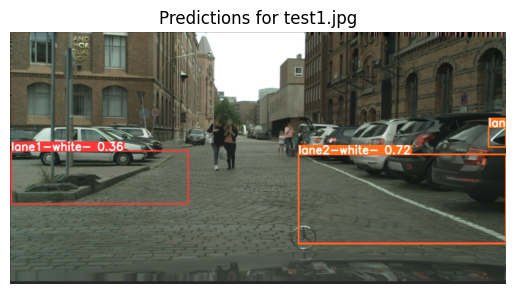


image 1/1 /content/drive/MyDrive/prediction/test2.jpg: 352x640 3 lane1-white-s, 1 lane2-white-, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


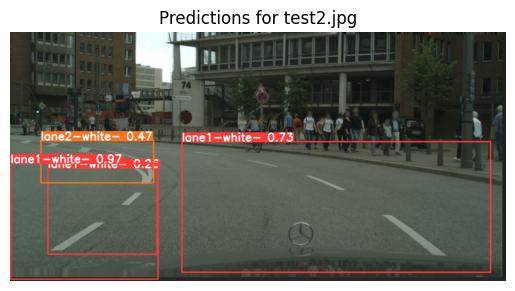


image 1/1 /content/drive/MyDrive/prediction/Copy of Copy of bus.jpg: 640x480 (no detections), 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
No detections for Copy of Copy of bus.jpg
Prediction completed!


In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Define paths
model_path = './Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/best.pt'  # Path to your trained YOLOv8 model
#model_path = 'runs/train/yarra_exp/weights/best.pt'  # Path to your trained YOLOv8 model
images_path = '/content/drive/MyDrive/prediction'  # Directory containing images for prediction
output_path = './Yarra-transfer-learning-cityscapes2roadlane/predict_out'

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Function to make predictions and save results
def predict_images(model, images_path, output_path):
    for image_name in os.listdir(images_path):
        if image_name.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(images_path, image_name)
            results = model.predict(source=image_path)

            for result in results:
                if len(result.boxes) > 0:  # Check if there are any detections
                    # Create a filename for the output image
                    output_image_path = os.path.join(output_path, image_name)

                    # Save the prediction results
                    result.save(output_image_path)

                    # Optional: Display the image with predictions
                    img = cv2.imread(output_image_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    plt.imshow(img_rgb)
                    plt.title(f"Predictions for {image_name}")
                    plt.axis('off')
                    plt.show()
                else:
                    print(f"No detections for {image_name}")

# Run predictions
predict_images(model, images_path, output_path)

print("Prediction completed!")


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r /content/Yarra-transfer-learning-cityscapes2roadlane_out.zip /content/Yarra-transfer-learning-cityscapes2roadlane/ /content/runs /content/data.yaml

  adding: content/Yarra-transfer-learning-cityscapes2roadlane/ (stored 0%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/ (stored 0%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/labels_correlogram.jpg (deflated 47%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/labels.jpg (deflated 35%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/ (stored 0%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/best.pt (deflated 10%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/weights/last.pt (deflated 10%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/val_batch0_labels.jpg (deflated 8%)
  adding: content/Yarra-transfer-learning-cityscapes2roadlane/cityscapes2roadlane/PR_curve.png (deflated 19%)
  adding: content/Yarra-transfer-learning-cit

In [ ]:
 !ls -ltr /content/

total 23556
drwxr-xr-x 1 root root     4096 May 31 13:30 sample_data
drwx------ 5 root root     4096 Jun  3 17:14 drive
drwxr-xr-x 4 root root     4096 Jun  3 17:14 kitti_dataset
drwxr-xr-x 2 root root     4096 Jun  3 17:17 labels_with_dont_care
drwxr-xr-x 2 root root     4096 Jun  3 17:18 labels
-rw-r--r-- 1 root root       78 Jun  3 17:18 classes_with_dont_care.json
drwxr-xr-x 2 root root    12288 Jun  3 17:20 train
drwxr-xr-x 2 root root     4096 Jun  3 17:20 valid
-rw-r--r-- 1 root root      116 Jun  3 17:20 data.yaml
-rw-r--r-- 1 root root  6534387 Jun  3 17:24 yolov8n.pt
-rw-r--r-- 1 root root    23277 Jun  3 17:24 train.cache
-rw-r--r-- 1 root root     3544 Jun  3 17:24 valid.cache
drwxr-xr-x 3 root root     4096 Jun  3 17:36 runs
drwxr-xr-x 5 root root     4096 Jun  3 17:48 Yarra-transfer-learning-cityscapes2roadlane
-rw-r--r-- 1 root root 17501144 Jun  3 17:57 Yarra-transfer-learning-cityscapes2roadlane_out.zip


In [ ]:
from google.colab import files

files.download('/content/Yarra-transfer-learning-cityscapes2roadlane_out.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>